## Import Stuff

In [1]:
import ROOT
import numpy as np
import time
import math
from math import exp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy import loadtxt
from random import choices
import random
from scipy import optimize
from scipy.optimize import fmin
from scipy.stats import poisson

Welcome to JupyROOT 6.22/08


ModuleNotFoundError: No module named 'sklearn'

## Parameters

In [3]:
#mean value of collisions in one bunch crossing (mu from pois dis)
mu = 12
#Upper boundary on number of tracks per colission
BoundaryUp = 12
#number of bunch crossings
BunchCrossings = 100000

### Short an Array function

In [115]:
def Shorten(B,Length): 
    A=[]
    for i in range(0,Length):
        A.append(B[i])
    return(A)

## Prop Calculation using ROOT

In [5]:

#Probability distribution on tracks per colission
f = ROOT.TF1("myFunc1", "e**(-0.272581-1.933719*x)+e**(-2.107228-0.198227*x)", -0.5, 999.5)
#Histogramm of Simulation
TackHisto =  {}
TrackHisto = ROOT.TH1F("Number of tracks per BC", "; Number of tracks; Probability", 1000, -0.5, 999.5)



### Function itself

In [6]:
def Tracks(muu,BCB):
    Tic = time.time()
    TrackHisto_Positions = [0]*1000
    TrackHisto_Data = []
    #Loop over bunch crossings
    for BC in range(BCB):
        Ti = time.time()
        total_tracks_per_BC = 0
        #Number of particles in this colission
        rand1 = ROOT.TRandom3(int(Ti))
        N = rand1.Poisson(muu)
        for i in range(N):
            #Number of tracks for each colission
            X = int(f.GetRandom())
            total_tracks_per_BC += X
        if total_tracks_per_BC < 1000:
            TrackHisto_Positions[total_tracks_per_BC] += 1
            TrackHisto_Data.append(total_tracks_per_BC)
    Norm_Fac = np.array(TrackHisto_Positions).sum()
    TrackHisto_Positions_Norm = (TrackHisto_Positions/Norm_Fac)
    Toc = time.time()
    Time_min = int((Toc-Tic)/60)
    Time_sec = round(Toc-Tic-60*Time_min)
    return(print("CPU time for %d bunch crossings: %d min %d s" %(BunchCrossings,Time_min,Time_sec) ),TrackHisto_Data,TrackHisto_Positions_Norm)

### Evaluation

In [7]:
(time_print,Data,Position) = Tracks(mu,BunchCrossings)
(time_printx,Datax,Positionx) = Tracks(mu,BunchCrossings)
(time_printy,Datay,Positiony) = Tracks(mu,BunchCrossings)
(time_printz,Dataz,Positionz) = Tracks(mu,BunchCrossings)

CPU time for 100000 bunch crossings: 0 min 3 s
CPU time for 100000 bunch crossings: 0 min 3 s
CPU time for 100000 bunch crossings: 0 min 2 s
CPU time for 100000 bunch crossings: 0 min 2 s


### Plot

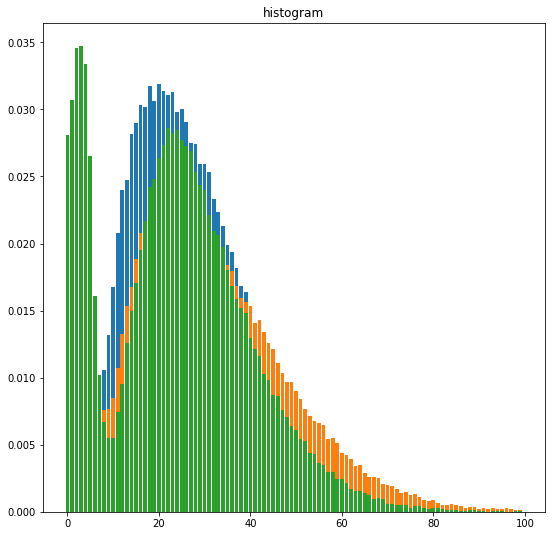

In [34]:
tic = time.time()
plt.bar(list(range(100)),Shorten(np.array(Position),100))
plt.bar(list(range(100)),Shorten(np.array(Positionx),100))
plt.bar(list(range(100)),Shorten(np.array(Positiony),100))
#plt.bar(list(range(100)),Shorten(np.array(Positionz),100))
plt.rcParams["figure.figsize"] = (9,9)
plt.title("histogram") 
plt.show()



## try with numpy

### Function definitions

In [76]:
def func(x):
    Value = exp(-0.272581-1.933719*x)+exp(-2.107228-0.198227*x)
    return(Value)

number = []
weights = []
for i in range(200):
    number.append(i)
    weights.append(func(i))
weights = np.array(weights)
weights = weights/np.sum(weights)

def Data_Eva(mu,Length):
    tic = time.time()
    X = [0] * 1000
    s = np.random.poisson(mu, Length)
    for i in range(Length):
        a = random.choices(number, weights,k=s[i])
        A = np.sum(a)
        if A < 1000:
            X[int(A)] += 1
    Data = np.array(X)
    Data = Data/np.sum(Data)
    toc = time.time()
    print("%f s" % (toc-tic))
    return(Data)

### Data evaluation

In [10]:
X = Data_Eva(12,100000)
Y = Data_Eva(12,100000)
Z = Data_Eva(12,100000)
TZ = Data_Eva(12,100000)

5.755994 s
5.677620 s
5.738265 s
5.681573 s


### Plots

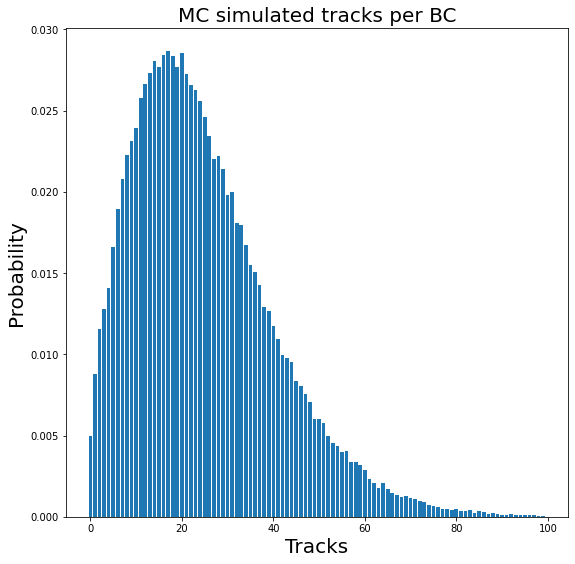

In [45]:
tic = time.time()
plt.bar(list(range(100)),Shorten(np.array(X),100))
#plt.bar(list(range(100)),Shorten(np.array(Y),100))
#plt.bar(list(range(100)),Shorten(np.array(Z),100))
#plt.bar(list(range(100)),Shorten(np.array(TZ),100))
plt.xlabel("Tracks", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.rcParams["figure.figsize"] = (9,9)
plt.title("MC simulated tracks per BC", fontsize=20) 
plt.savefig("MC_Tracks_Per_BC.pdf")

## Finding mu

### Method Marcel

In [12]:
Tic = time.time()
Diff_Array = []
Diff_Dis_Array = []
for i in range(1,100):
    C = Data_Eva(i,BunchCrossings)
    Diff_Dis_Array.append(C)
    Diff = np.sum(np.array(abs(C-X)))
    Diff_Array.append(Diff)+
    
    print("absolute difference for mu = %d: %f" %(i,Diff))
    print("-------------------------------")
Toc = time.time()
Time_min = int((Toc-Tic)/60)
Time_sec = round(Toc-Tic-60*Time_min)
print("Finished. Time: %d min and %f s" % (Time_min,Time_sec))


4.758744 s
absolute difference for 1: 1.592860
-------------------------------
4.736913 s
absolute difference for 2: 1.388380
-------------------------------
4.850313 s
absolute difference for 3: 1.209500
-------------------------------
4.927247 s
absolute difference for 4: 1.048140
-------------------------------
4.968032 s
absolute difference for 5: 0.892740
-------------------------------
5.073865 s
absolute difference for 6: 0.750800
-------------------------------
5.168262 s
absolute difference for 7: 0.611280
-------------------------------
5.259476 s
absolute difference for 8: 0.476420
-------------------------------
5.357702 s
absolute difference for 9: 0.357540
-------------------------------
5.418580 s
absolute difference for 10: 0.225480
-------------------------------
5.535207 s
absolute difference for 11: 0.109000
-------------------------------
5.602859 s
absolute difference for 12: 0.025260
-------------------------------
5.658193 s
absolute difference for 13: 0.110960
-

### export data

In [16]:
np.savetxt("Data_Marcel_Mu_Tracks.txt", Diff_Dis_Array)

### import data

In [17]:
Data_Marcel = loadtxt("Data_Marcel_Mu_Tracks.txt");

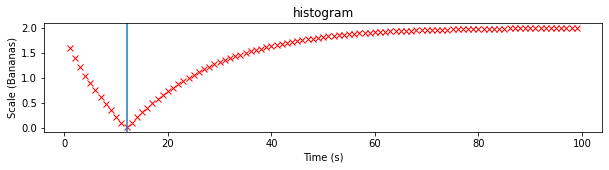

In [28]:
plt.plot(range(1,100), Diff_Array, 'rx')
#plt.plot(range(1,100), Diff_Array, 'b-.')
plt.xlabel("Time (s)")
plt.ylabel("Scale (Bananas)")
plt.title("histogram") 
plt.axvline(mu, 0, 1, label='mu value')
plt.rcParams["figure.figsize"] = (2,2)
plt.show()

### Method Christian

### Functions

In [97]:
def Tracks_N(N):
    TrackHisto_Positions=[0] * 1000
    TrackHisto_Data = []
    Tic = time.time()
    #Loop over bunch crossings
    for BC in range(BunchCrossings):
        total_tracks_per_BC = 0
        X = random.choices(number, weights,k=N)
        total_tracks_per_BC = np.sum(X)
        if total_tracks_per_BC <= 1000:
            TrackHisto_Positions[total_tracks_per_BC] += 1
            TrackHisto_Data.append(total_tracks_per_BC)
    Norm_Fac = np.array(TrackHisto_Positions).sum()
    TrackHisto_Positions_Norm = (TrackHisto_Positions/Norm_Fac)
    Toc = time.time()
    Time_min = int((Toc-Tic)/60)
    Time_sec = round(Toc-Tic-60*Time_min)
    return(print("CPU time for %d bunch crossings and N=%d: %d min %d s" %(BunchCrossings,N,Time_min,Time_sec) ),TrackHisto_Data,TrackHisto_Positions_Norm)

def Pois(mu,N):
    Prob = (exp(-mu+N*np.log(mu)))/(fakult(N))
    return(Prob)

def fakult(n):
    if n < 0:
        raise ValueError
    # 0! = 1
    if n == 0:
        return 1
    else:
        save = 1
        for i in range(2,n+1):
            save *= i
        return save

### Creating reference Data

In [89]:
Tic = time.time()
List_of_Reference = []
for i in range(1,101):
    (A,B,C) = Tracks_N(i)
    List_of_Reference.append(C)
    print("------------")
Toc = time.time()
Time_min = int((Toc-Tic)/60)
Time_sec = Toc-Tic-60*Time_min
print("finished in %d min and %f s" % (Time_min,Time_sec))
print(len(List_of_Reference))

CPU time for 100000 bunch crossings and N=1: 0 min 4 s
------------
CPU time for 100000 bunch crossings and N=2: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=3: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=4: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=5: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=6: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=7: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=8: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=9: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=10: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=11: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=12: 0 min 5 s
------------
CPU time for 100000 bunch crossings and N=13: 0 min 6 s
------------
CPU time for 100000 bunch crossings and N=14: 0 min 6 s
------------
CPU time for 100000 bunch crossings and N=1

### export data

In [14]:
np.savetxt("Data_Christian_N_Tracks.txt", Diff_Dis_Array)

### import data

In [15]:
Data_Christian = loadtxt("Data_Christian_N_Tracks.txt");

### Creating Distribution

In [106]:
List_of_Reference
mu=12
Total = [0]*1000
for i in range(0,100):
    Import = np.array(List_of_Reference[i])
    ThisStep = Pois(mu,i) * Import
    Total = np.add(Total,ThisStep)

### Plot distribution

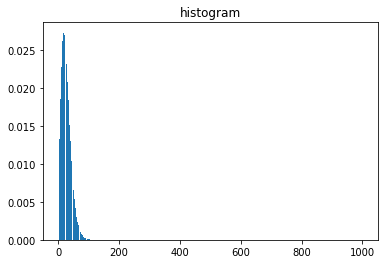

In [107]:
tic = time.time()
plt.bar(list(range(1000)),np.array(Total))
plt.title("histogram") 
plt.show()

### Difference

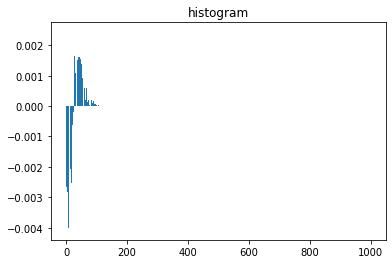

absolute error: 0.109435


In [108]:
tic = time.time()
plt.bar(list(range(1000)),np.array(Total-X))
plt.title("histogram") 
plt.show()
absolute_error = np.sum(abs(Total-X))
print("absolute error: %f" % absolute_error)

In [2]:
def sum_to_n(n, size,limit=None):
    """Produce all lists of `size` all combinations of positive 
    integers that add up to `n`."""
    if size == 1:#gives values of last position
        yield [n]
        return
    if limit is None:#sets limit
        limit = n
    start = 0 # start value of all numbers
    stop = size+1 # max value of all numbers
    # fix on value and go on to the next position
    for i in range(start, stop): 
        # decrease n (the availbe number) by the amount of the fixed
        # number (here i) and size by 1 (next position)
        for tail in sum_to_n(n - i, size - 1, i):
            #append final array
            yield [i] + tail

In [3]:
#create a list of all combinations
def Combinations(Tracks,N):
    List_of_Lists = []
    for partition in sum_to_n(Tracks, N):
        List_of_Lists.append(partition)
    return(List_of_Lists)

In [4]:
Tic = time.time()
Time_List = []
N = 10
X_max = 2
for i in range(X_max):
    Array_Posibility = Combinations(i,N)
    Toc_Between = time.time()
    Time_List.append(Toc_Between-Tic)
    print("Time for X = %d: %f s" % (i,Toc_Between-Tic))    
Toc = time.time()
print("Time for N = %d and X_max = %d: %f s" % (N,X_max,Toc-Tic))

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (17,) and (7,)

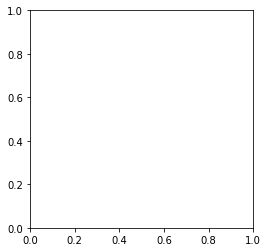

In [28]:
plt.plot(range(X_max), Time_List, 'b-')
plt.xlabel("Up to Tracks)", fontsize=20)
plt.ylabel("Time [s]", fontsize=20)
plt.title("Time over Tracks", fontsize=20) 
plt.rcParams["figure.figsize"] = (4,4)
plt.safefig("Time_over_Tracks.pdf")

In [88]:
List_of_Lists = []
for partition in sum_to_n(2, 1):
    print(partition)
    List_of_Lists.append(partition)

[2]


# Complete New try

In [37]:
Tracks = 1600
N = 700

## Functions

In [38]:
def func(x):
    Value = exp(-0.272581-1.933719*x)+exp(-2.107228-0.198227*x)
    return(Value)

number = []
weights = []
for i in range(Tracks):
    number.append(i)
    weights.append(func(i))
weights = np.array(weights)
weights = weights/np.sum(weights)


'Data_Eva(mu,Length) returns the simulated data'
def Data_Eva(mu,Length):
    tic = time.time()
    X = [0] * Tracks
    s = np.random.poisson(mu, Length)#random number from poisson distribution - number of pp col.
    for i in range(Length):
        a = random.choices(number, weights,k=s[i])#for each pp col. a random number of tracks corresponding to the pdf func(x)
        A = np.sum(a)
        if A < Tracks:# error prevention since len(X) = Tracks
            X[int(A)] += 1
    Data = np.array(X)
    Data = Data/np.sum(Data)
    toc = time.time()
    print("%f s" % (toc-tic))
    return(Data)

## Reference Data

In [39]:
Tic = time.time()
Track_list = [weights]
b = weights
for l in range(1,N+1):
    c = [0] * Tracks
    for i in range(Tracks):
        for k in range(i+1):
            c[i] += weights[k] * b[i-k] 
    b = c
    Track_list.append(b)
Toc = time.time()
print(Toc-Tic)

823.6382746696472


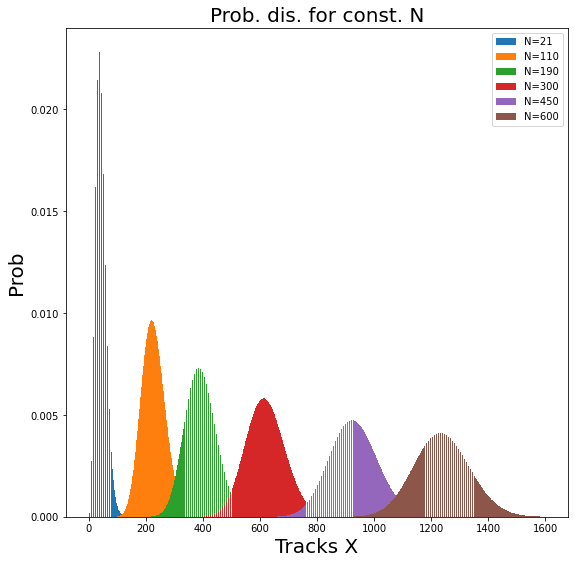

In [46]:
tic = time.time()
plt.bar(list(range(Tracks)),Track_list[20],label = "N=21")
plt.bar(list(range(Tracks)),Track_list[109],label = "N=110")
plt.bar(list(range(Tracks)),Track_list[189],label = "N=190")
plt.bar(list(range(Tracks)),Track_list[299],label = "N=300")
plt.bar(list(range(Tracks)),Track_list[449],label = "N=450")
plt.bar(list(range(Tracks)),Track_list[599],label = "N=600")
#plt.bar(list(range(Tracks)),Track_list[749],label = "N=750")
#plt.bar(list(range(Tracks)),Track_list[999],label = "N=1000")
plt.xlabel('Tracks X',fontsize=20)
plt.ylabel('Prob',fontsize=20)
plt.title("Prob. dis. for const. N",fontsize=20) 
plt.legend()
plt.rcParams["figure.figsize"] = (9,9)
plt.savefig("Constant_N_dis.pdf")

In [41]:
k = 110
np.sum(np.array(Track_list[k]))


0.9999999999999948

In [42]:
Ta = [0] * 300
for i in range(300):
            for k in range(300-i):
                Ta[i] += weights[k+i] * weights[299-k] 
Ta = np.array(Ta)
Sum = np.sum(Ta)
print(Sum)

1.8184589127411243e-25


## Data

In [50]:
X = Data_Eva(160,100000)

64.470253 s


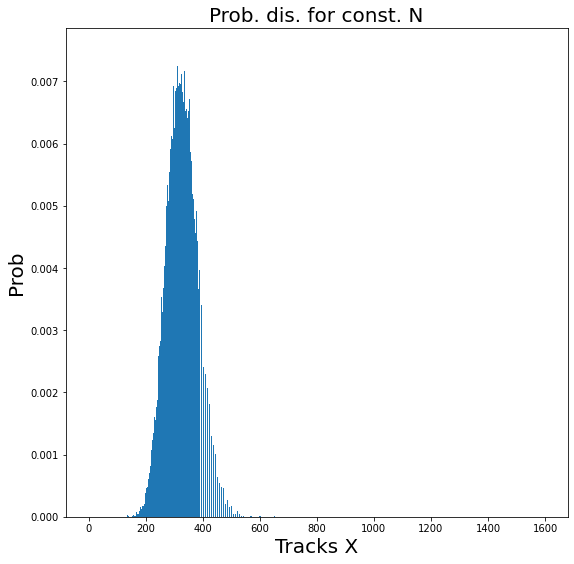

In [51]:
tic = time.time()
plt.bar(list(range(Tracks)),X )
plt.xlabel('Tracks X',fontsize=20)
plt.ylabel('Prob',fontsize=20)
plt.title("Prob. dis. for const. N",fontsize=20) 
plt.rcParams["figure.figsize"] = (9,9)
plt.show()

## reconstruct

In [81]:
def Abs_diff(Mu_value,List_reference,data):
    Total = [0]*Tracks
    for i in range(N):
        Import = np.array(List_reference[i])
        ThisStep = poisson.pmf(i+1,Mu_value ) * Import
        Total = np.add(Total,ThisStep)
    c=0
    for i in range(Tracks):
        c += abs(Total[i]-data[i])
    return(c)

def Abs_diff_fit(a):
    if a<0:
        return(10)
    else:
        AbsoluteDiff = Abs_diff(a,Track_list,X)
        return(AbsoluteDiff)

In [82]:
b=0
c=0
for i in range(Tracks):
    b += weights[i] * i
    c += X[i] *i
a = c/b
print(a)
Fit1 = optimize.minimize(Abs_diff_fit, x0=a)
Fit2 = fmin(Abs_diff_fit,np.array([a]))
print(Fit1)
print(Fit2)

160.00852863904447
Optimization terminated successfully.
         Current function value: 0.043866
         Iterations: 20
         Function evaluations: 40
      fun: 0.04386599621812459
 hess_inv: array([[319.17751731]])
      jac: array([-5.27594239e-07])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 3
     njev: 48
   status: 0
  success: True
        x: array([159.97802934])
[159.97807047]


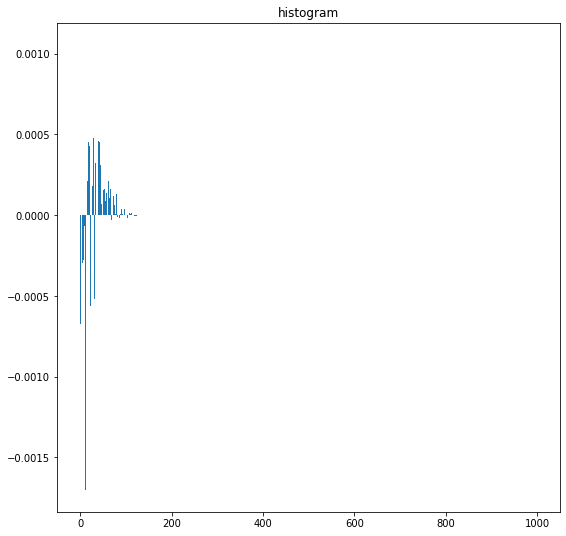

absolute error: 0.023248


In [17]:
plt.bar(list(range(1000)),np.array(Total-X))
plt.title("histogram") 
plt.show()
absolute_error = np.sum(abs(Total-X))
print("absolute error: %f" % absolute_error)

In [76]:
poisson.pmf(9, 10)

0.12511003572113372

In [ ]:
# Just writing down some helpful links
# https://www.hackdeploy.com/fitting-probability-distributions-with-python/
# https://stats.stackexchange.com/questions/66192/how-to-fit-a-discrete-distribution-to-count-data